In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
######### Throughput #########

# In megabytes/second
mass_storage_x86_native = pd.read_csv(
    "./mass-storage/raw_benchmark_report_x86_native.csv"
) / (1024 * 1024)
mass_storage_x86_wasm = pd.read_csv(
    "./mass-storage/raw_benchmark_report_x86_wasm.csv"
) / (1024 * 1024)
mass_storage_aarch64_native = pd.read_csv(
    "./mass-storage/raw_benchmark_report_aarch64_native.csv"
) / (1024 * 1024)
mass_storage_aarch64_wasm = pd.read_csv(
    "./mass-storage/raw_benchmark_report_aarch64_wasm.csv"
) / (1024 * 1024)
mass_storage_windows_native = pd.read_csv(
    "./mass-storage/raw_benchmark_report_windows_native.csv"
) / (1024 * 1024)
mass_storage_windows_wasm = pd.read_csv(
    "./mass-storage/raw_benchmark_report_windows_wasm.csv"
) / (1024 * 1024)

In [3]:
mass_storage_x86_native["type"] = "Native"
mass_storage_aarch64_native["type"] = "Native"
mass_storage_windows_native["type"] = "Native"

mass_storage_x86_wasm["type"] = "WebAssembly"
mass_storage_aarch64_wasm["type"] = "WebAssembly"
mass_storage_windows_wasm["type"] = "WebAssembly"

mass_storage_x86_native["platform"] = "x86 Linux"
mass_storage_x86_wasm["platform"] = "x86 Linux"
mass_storage_aarch64_native["platform"] = "AArch64 Linux"
mass_storage_aarch64_wasm["platform"] = "AArch64 Linux"
mass_storage_windows_native["platform"] = "x86 Windows"
mass_storage_windows_wasm["platform"] = "x86 Windows"

In [4]:
mass_storage_x86_native

,SEQ WRITE,SEQ READ,RND WRITE,RND READ,type,platform
0,35.266708,145.269451,20.865245,113.299953,Native,x86 Linux
1,34.100025,139.309902,19.075227,112.990774,Native,x86 Linux
2,34.384457,145.634002,18.681580,113.339456,Native,x86 Linux
3,33.599097,139.725407,19.158644,111.904136,Native,x86 Linux
4,34.468701,143.167062,19.206558,112.591838,Native,x86 Linux
5,32.957724,142.355582,18.822583,113.201909,Native,x86 Linux
6,34.170857,144.371182,18.575863,111.836431,Native,x86 Linux
7,33.556460,139.432709,18.980446,112.734451,Native,x86 Linux
8,34.386456,139.345055,19.019238,113.343804,Native,x86 Linux
9,33.802777,139.015937,18.804604,113.549836,Native,x86 Linux


In [5]:
def create_df(native_df, wasm_df, key):
    return pd.concat(
        [
            native_df[[key, "type", "platform"]],
            wasm_df[[key, "type", "platform"]],
        ]
    )

In [6]:
seq_read_x86 = create_df(mass_storage_x86_native, mass_storage_x86_wasm, "SEQ READ")
seq_read_aarch64 = create_df(
    mass_storage_aarch64_native, mass_storage_aarch64_wasm, "SEQ READ"
)
seq_read_windows = create_df(
    mass_storage_windows_native, mass_storage_windows_wasm, "SEQ READ"
)

In [7]:
seq_read_x86

,SEQ READ,type,platform
0,145.269451,Native,x86 Linux
1,139.309902,Native,x86 Linux
2,145.634002,Native,x86 Linux
3,139.725407,Native,x86 Linux
4,143.167062,Native,x86 Linux
5,142.355582,Native,x86 Linux
6,144.371182,Native,x86 Linux
7,139.432709,Native,x86 Linux
8,139.345055,Native,x86 Linux
9,139.015937,Native,x86 Linux


In [8]:
seq_read_combined = pd.concat([seq_read_x86, seq_read_aarch64, seq_read_windows])

seq_read_combined

,SEQ READ,type,platform
0,145.269451,Native,x86 Linux
1,139.309902,Native,x86 Linux
2,145.634002,Native,x86 Linux
3,139.725407,Native,x86 Linux
4,143.167062,Native,x86 Linux
5,142.355582,Native,x86 Linux
6,144.371182,Native,x86 Linux
7,139.432709,Native,x86 Linux
8,139.345055,Native,x86 Linux
9,139.015937,Native,x86 Linux


In [9]:
seq_read_medians = seq_read_combined.groupby(["type", "platform"])["SEQ READ"].median()

seq_read_medians


type         platform     
Native       AArch64 Linux     34.689437
             x86 Linux        141.040495
             x86 Windows      150.958507
WebAssembly  AArch64 Linux     33.264014
             x86 Linux        140.207043
             x86 Windows      150.622502
Name: SEQ READ, dtype: float64

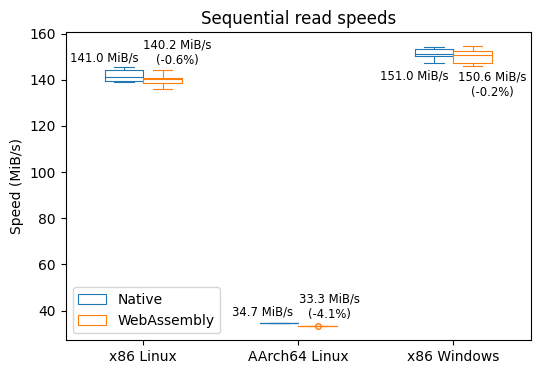

In [10]:
plt.figure(figsize=(6,4))
boxplt = sns.boxplot(data=seq_read_combined, x="platform", y="SEQ READ", hue="type", legend="brief", fill=False, width=0.5, linewidth=0.8, fliersize=4)
plt.title("Sequential read speeds")
plt.xlabel(None)
plt.ylabel("Speed (MiB/s)")
plt.legend(title="")

boxplt.text(0-0.25, 148, f"{seq_read_medians["Native"]["x86 Linux"]:.1f} MiB/s", horizontalalignment="center", size='small', weight='normal')
boxplt.text(0+0.22, 147, f"{seq_read_medians["WebAssembly"]["x86 Linux"]:.1f} MiB/s\n(-{(100 * (seq_read_medians["Native"]["x86 Linux"] - seq_read_medians["WebAssembly"]["x86 Linux"]) / seq_read_medians["Native"]["x86 Linux"]):.1f}%)", horizontalalignment="center", size='small', weight='normal')

boxplt.text(1-0.23, 38, f"{seq_read_medians["Native"]["AArch64 Linux"]:.1f} MiB/s", horizontalalignment="center", size='small', weight='normal')
boxplt.text(1+0.2, 37, f"{seq_read_medians["WebAssembly"]["AArch64 Linux"]:.1f} MiB/s\n(-{(100 * (seq_read_medians["Native"]["AArch64 Linux"] - seq_read_medians["WebAssembly"]["AArch64 Linux"]) / seq_read_medians["Native"]["AArch64 Linux"]):.1f}%)", horizontalalignment="center", size='small', weight='normal')

boxplt.text(2-0.25, 140, f"{seq_read_medians["Native"]["x86 Windows"]:.1f} MiB/s", horizontalalignment="center", size='small', weight='normal')
boxplt.text(2+0.25, 133, f"{seq_read_medians["WebAssembly"]["x86 Windows"]:.1f} MiB/s\n(-{(100 * (seq_read_medians["Native"]["x86 Windows"] - seq_read_medians["WebAssembly"]["x86 Windows"]) / seq_read_medians["Native"]["x86 Windows"]):.1f}%)", horizontalalignment="center", size='small', weight='normal')

plt.savefig("figures/seq_read_combined.pdf", bbox_inches="tight")
plt.show()